In [3]:
import pandas as pd
#Load libraries
from sklearn.preprocessing import PowerTransformer
import numpy as np
from kmodes.kprototypes import KPrototypes
#Load libraries
from matplotlib import style
from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#Load library
from sklearn.preprocessing import LabelEncoder
import os
import random

In [53]:
df_clust = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/K_proto_stand_removal_of_medication.csv', low_memory=False)

In [3]:
df_to_be_appended = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/df_to_be_clustered_08+_with_ID.csv', low_memory=False)

In [4]:
df_to_be_appended_final = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/df_to_be_clustered_08+_with_ID.csv', low_memory=False)

In [5]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 364 entries, Unnamed: 0 to Onset.OR.First.Diagnosis.Uncertain
dtypes: float64(144), int64(219), object(1)
memory usage: 1.7+ MB


In [54]:
df_clust.head(5)

Unnamed: 0      X  Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
0           1  A_348                  -0.342803                    0.661544   
1           2  A_544                  -0.185872                   -2.475151   
2           3  A_018                   0.064556                   -0.500135   
3           4  A_613                   1.087608                    0.566182   
4           5  A_390                   0.794419                   -2.964420   

   Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
0                    -0.873296                    -0.118239   
1                    -0.264045                     0.551317   
2                     0.238829                     0.196620   
3                     0.321316                     1.120895   
4                     0.080898                     0.143794   

   Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
0                         -1.316411                    -0.104893   
1                          0.401209                     1.164455   
2                         -0.065821                    -1.517908   
3                         -0.190881                     0.961596   
4                          0.937631                     0.910840   

   Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
0                         1.657433                          1.362411   
1                         1.657433                         -0.542305   
2                        -0.346662                         -0.747502   
3                         0.069512                          1.841401   
4                         1.657433                         -0.487365   

   Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  \
0                   0.139224                      -0.034611   
1                   0.122940                      -0.685494   
2                  -0.024157                      -0.481220   
3                  -1.456158                      -0.364941   
4                  -0.540695                      -0.999027   

   Biomarker.MCP.4.pg.ml.serum  Biomarker.MMP.3.pg.ml.serum  \
0                     2.208153                            0   
1                    -0.427698                            0   
2                    -1.170410                            0   
3                     0.383501                            0   
4                     0.614199                            0   

   Biomarker.RAGE.pg.ml.serum  Biomarker.SHBG.pg.ml.serum  \
0                    0.019561                    0.386541   
1                   -0.204663                   -0.429325   
2                   -0.216626                    3.402404   
3                   -0.613829                    0.379189   
4                   -1.048328                   -1.869631   

   Biomarker.Serpin.E1.pg.ml.serum  \
0                         0.497764   
1                        -0.704478   
2                        -0.253732   
3                         0.378126   
4                        -0.449252   

   Biomarker.alpha1.microglobulin.pg.ml.serum  \
0                                    0.318004   
1                                    0.290463   
2                                   -0.618573   
3                                    0.480284   
4                                    0.206515   

   Biomarker.CCL17.pg.ml.MSD.BL.plasma  Biomarker.CCL22.pg.ml.MSD.BL.plasma  \
0                             1.172706                             0.120983   
1                             0.484322                            -0.026554   
2                            -1.117039                            -0.271109   
3                             1.004566                             0.455893   
4                             0.539303                             0.239393   

   Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma  \
0                               1.067738   
1                               0.414125   
2                              -0.897445   
3      

In [55]:
#Drop Unnamed: 0 variable
df_clust.drop('Unnamed: 0', axis = 1, inplace = True)

In [8]:
df_to_be_appended.head(5)

Unnamed: 0      X  \
0           0  A_348   
1           1  A_544   
2           2  A_018   
3           3  A_613   
4           4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                

In [9]:
#Drop Unnamed: 0 variable
df_to_be_appended.drop('Unnamed: 0', axis = 1, inplace = True)

In [56]:
#Set index aside (Patient ID) as we don't want to include it in K-prototypes (done already)
ID = df_clust['X'].to_list()
ID= np.asarray(ID)
len(ID)

620

In [57]:
df_clust.head(5)

X  Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
0  A_348                  -0.342803                    0.661544   
1  A_544                  -0.185872                   -2.475151   
2  A_018                   0.064556                   -0.500135   
3  A_613                   1.087608                    0.566182   
4  A_390                   0.794419                   -2.964420   

   Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
0                    -0.873296                    -0.118239   
1                    -0.264045                     0.551317   
2                     0.238829                     0.196620   
3                     0.321316                     1.120895   
4                     0.080898                     0.143794   

   Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
0                         -1.316411                    -0.104893   
1                          0.401209                     1.164455   
2                         -0.065821                    -1.517908   
3                         -0.190881                     0.961596   
4                          0.937631                     0.910840   

   Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
0                         1.657433                          1.362411   
1                         1.657433                         -0.542305   
2                        -0.346662                         -0.747502   
3                         0.069512                          1.841401   
4                         1.657433                         -0.487365   

   Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  \
0                   0.139224                      -0.034611   
1                   0.122940                      -0.685494   
2                  -0.024157                      -0.481220   
3                  -1.456158                      -0.364941   
4                  -0.540695                      -0.999027   

   Biomarker.MCP.4.pg.ml.serum  Biomarker.MMP.3.pg.ml.serum  \
0                     2.208153                            0   
1                    -0.427698                            0   
2                    -1.170410                            0   
3                     0.383501                            0   
4                     0.614199                            0   

   Biomarker.RAGE.pg.ml.serum  Biomarker.SHBG.pg.ml.serum  \
0                    0.019561                    0.386541   
1                   -0.204663                   -0.429325   
2                   -0.216626                    3.402404   
3                   -0.613829                    0.379189   
4                   -1.048328                   -1.869631   

   Biomarker.Serpin.E1.pg.ml.serum  \
0                         0.497764   
1                        -0.704478   
2                        -0.253732   
3                         0.378126   
4                        -0.449252   

   Biomarker.alpha1.microglobulin.pg.ml.serum  \
0                                    0.318004   
1                                    0.290463   
2                                   -0.618573   
3                                    0.480284   
4                                    0.206515   

   Biomarker.CCL17.pg.ml.MSD.BL.plasma  Biomarker.CCL22.pg.ml.MSD.BL.plasma  \
0                             1.172706                             0.120983   
1                             0.484322                            -0.026554   
2                            -1.117039                            -0.271109   
3                             1.004566                             0.455893   
4                             0.539303                             0.239393   

   Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma  \
0                               1.067738   
1                               0.414125   
2                              -0.897445   
3                               1.174185   
4                               0.43080

MAKE COPY OF DF_CLUST TO SCALE CATEGORICAL VARIABLES (0-1) AS WELL

In [58]:
df_clust_scale_cat = df_clust.copy()

In [59]:
df_clust_scale_cat.head(5)

X  Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
0  A_348                  -0.342803                    0.661544   
1  A_544                  -0.185872                   -2.475151   
2  A_018                   0.064556                   -0.500135   
3  A_613                   1.087608                    0.566182   
4  A_390                   0.794419                   -2.964420   

   Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
0                    -0.873296                    -0.118239   
1                    -0.264045                     0.551317   
2                     0.238829                     0.196620   
3                     0.321316                     1.120895   
4                     0.080898                     0.143794   

   Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
0                         -1.316411                    -0.104893   
1                          0.401209                     1.164455   
2                         -0.065821                    -1.517908   
3                         -0.190881                     0.961596   
4                          0.937631                     0.910840   

   Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
0                         1.657433                          1.362411   
1                         1.657433                         -0.542305   
2                        -0.346662                         -0.747502   
3                         0.069512                          1.841401   
4                         1.657433                         -0.487365   

   Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  \
0                   0.139224                      -0.034611   
1                   0.122940                      -0.685494   
2                  -0.024157                      -0.481220   
3                  -1.456158                      -0.364941   
4                  -0.540695                      -0.999027   

   Biomarker.MCP.4.pg.ml.serum  Biomarker.MMP.3.pg.ml.serum  \
0                     2.208153                            0   
1                    -0.427698                            0   
2                    -1.170410                            0   
3                     0.383501                            0   
4                     0.614199                            0   

   Biomarker.RAGE.pg.ml.serum  Biomarker.SHBG.pg.ml.serum  \
0                    0.019561                    0.386541   
1                   -0.204663                   -0.429325   
2                   -0.216626                    3.402404   
3                   -0.613829                    0.379189   
4                   -1.048328                   -1.869631   

   Biomarker.Serpin.E1.pg.ml.serum  \
0                         0.497764   
1                        -0.704478   
2                        -0.253732   
3                         0.378126   
4                        -0.449252   

   Biomarker.alpha1.microglobulin.pg.ml.serum  \
0                                    0.318004   
1                                    0.290463   
2                                   -0.618573   
3                                    0.480284   
4                                    0.206515   

   Biomarker.CCL17.pg.ml.MSD.BL.plasma  Biomarker.CCL22.pg.ml.MSD.BL.plasma  \
0                             1.172706                             0.120983   
1                             0.484322                            -0.026554   
2                            -1.117039                            -0.271109   
3                             1.004566                             0.455893   
4                             0.539303                             0.239393   

   Biomarker.EOTAXIN.pg.ml.MSD.BL.plasma  \
0                               1.067738   
1                               0.414125   
2                              -0.897445   
3                               1.174185   
4                               0.43080

SET X as index for df_clust_scale_cat

In [60]:
df_clust_scale_cat = df_clust_scale_cat.set_index('X')

In [61]:
#Check dtypes of categorical variables in df_clust_scale_cat
df_clust_scale_cat.iloc[:,175:362].dtypes
#They are recorded as int64.

Asthma.Diag.Fev.Variation                                  int64
Asthma.Diag.Pef.Variation                                  int64
Asthma.Diag.Historic.Test                                  int64
Expo.Aspirin                                               int64
Expo.Barns                                                 int64
Expo.Cold.Air                                              int64
Expo.Dust                                                  int64
Expo.Fungus                                                int64
Expo.Menstrual.Cycle                                       int64
Expo.Perfumes                                              int64
Expo.Pets                                                  int64
Expo.Physical.Exercise                                     int64
Expo.Pollen                                                int64
Expo.Pollutants                                            int64
Expo.Respiratory.Infections                                int64
Expo.Routine.Physical.Act

STANDARDIZE SCALING OF CATEGORICAL VARIABLES USING YEO - JOHNSON

In [62]:
from sklearn.preprocessing import PowerTransformer
for c in df_clust_scale_cat.iloc[:,175:362]:
    pt = PowerTransformer()
    df_clust_scale_cat[c] =  pt.fit_transform(np.array(df_clust_scale_cat[c]).reshape(-1, 1))

In [64]:
#Check that it has been successfully implemented
df_clust_scale_cat.head(10)

Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
X                                                              
A_348                  -0.342803                    0.661544   
A_544                  -0.185872                   -2.475151   
A_018                   0.064556                   -0.500135   
A_613                   1.087608                    0.566182   
A_390                   0.794419                   -2.964420   
A_630                   0.015487                   -0.166579   
A_311                  -1.038498                    0.178374   
A_709                  -0.975240                   -1.019898   
A_183                  -0.617681                   -0.020298   
A_064                   1.087608                   -1.141987   

       Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
X                                                                 
A_348                    -0.873296                    -0.118239   
A_544                    -0.264045                     0.551317   
A_018                     0.238829                     0.196620   
A_613                     0.321316                     1.120895   
A_390                     0.080898                     0.143794   
A_630                     0.247539                     0.265351   
A_311                    -0.582645                     2.199947   
A_709                     0.915149                    -2.486371   
A_183                    -0.216634                     0.785226   
A_064                     0.483764                    -0.090627   

       Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
X                                                                      
A_348                         -1.316411                    -0.104893   
A_544                          0.401209                     1.164455   
A_018                         -0.065821                    -1.517908   
A_613                         -0.190881                     0.961596   
A_390                          0.937631                     0.910840   
A_630                         -0.122790                    -1.800223   
A_311                         -0.832150                    -0.237166   
A_709                         -0.023133                    -1.264785   
A_183                          0.357341                    -0.613819   
A_064                          1.431913                    -0.375529   

       Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
X                                                                          
A_348                         1.657433                          1.362411   
A_544                         1.657433                         -0.542305   
A_018                        -0.346662                         -0.747502   
A_613                         0.069512                          1.841401   
A_390                         1.657433                         -0.487365   
A_630                         0.351239                         -1.064204   
A_311                         0.924315                         -0.575836   
A_709                         0.636218                         -1.743727   
A_183                        -0.754629                          0.329758   
A_064                         1.657433                          0.729187   

       Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  \
X                                                                 
A_348                   0.139224                      -0.034611   
A_544                   0.122940                      -0.685494   
A_018                  -0.024157                      -0.481220   
A_613                  -1.456158                      -0.364941   
A_390                  -0.540695                      -0.999027   
A_630                  -1.235916                       0.182367   
A_311                  -0.544400                       0.290996   
A_709                  -0.433095                    

In [65]:
#Check datatypes of variables after transformation
df_clust_scale_cat.iloc[:,175:362].dtypes
df_clust_scale_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, A_348 to A_353
Columns: 362 entries, Biomarker.C5a.pg.ml.serum to Onset.OR.First.Diagnosis.Uncertain
dtypes: float64(331), int64(31)
memory usage: 1.7+ MB


In [66]:
#Convert range of variables 175-362 to category as they are recorded as float64 after the transformation but remain cat variables that need to have a category type for K-prototypes
df_clust_scale_cat.iloc[:,175:362]=df_clust_scale_cat.iloc[:,175:362].astype('category')

In [67]:
#Check the successful implementation.
df_clust_scale_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, A_348 to A_353
Columns: 362 entries, Biomarker.C5a.pg.ml.serum to Onset.OR.First.Diagnosis.Uncertain
dtypes: category(187), float64(144), int64(31)
memory usage: 998.7+ KB


In [68]:
#Convert df_clust_scale_cat to a numpy array that we call X_df_scale_cat
X_df_scale_cat = df_clust_scale_cat.iloc[:,:].values
#Look at shape
X_df_scale_cat.shape

(620, 362)

In [28]:
#Drop X variable from df_clust
df_clust.drop('X', axis = 1, inplace = True)

In [29]:
#Convert range of variables 175-362 to category as they are recorded as float but are in fact ordinal (categorical) variables in df_clust
df_clust.iloc[:,175:362]=df_clust.iloc[:,175:362].astype('category')

In [30]:
#Check variable types for specific columns using:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
df_clust.iloc[:,175:362].dtypes

Asthma.Diag.Fev.Variation                                  category
Asthma.Diag.Pef.Variation                                  category
Asthma.Diag.Historic.Test                                  category
Expo.Aspirin                                               category
Expo.Barns                                                 category
Expo.Cold.Air                                              category
Expo.Dust                                                  category
Expo.Fungus                                                category
Expo.Menstrual.Cycle                                       category
Expo.Perfumes                                              category
Expo.Pets                                                  category
Expo.Physical.Exercise                                     category
Expo.Pollen                                                category
Expo.Pollutants                                            category
Expo.Respiratory.Infections                     

In [31]:
df_clust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 362 entries, Biomarker.C5a.pg.ml.serum to Onset.OR.First.Diagnosis.Uncertain
dtypes: category(187), float64(144), int64(31)
memory usage: 994.0 KB


In [32]:
#Convert df_clust to a numpy array that we call X_df_clust
X_df_clust = df_clust.iloc[:,:].values
#Look at shape
X_df_clust.shape

(620, 362)

In [69]:
#Define categorical columns in df_clust and df_clust_scale_cat
cat_columns_df_clust = [174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,
239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,
280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,
321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361]

In [27]:
#From the multiple criteria, optimal number of K is 3
#Run kprototypes with K=3
random.seed(90)
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

kproto_df_clust = KPrototypes(n_clusters= 3, init='Cao', n_jobs = 4)
cluster_df_clust = kproto_df_clust.fit_predict(X_df_clust, categorical = cat_columns_df_clust)

# Print cluster centroids of the trained model.
print(kproto_df_clust.cluster_centroids_)

# Print training statistics
print(kproto_df_clust.cost_)
print(kproto_df_clust.n_iter_)

[[ 0.04946929 -0.03181951  0.17281815 ...  0.          0.
   0.        ]
 [ 0.15238991  0.16458001  0.07609317 ...  0.          0.
   0.        ]
 [-0.17731518 -0.12581173 -0.20267225 ...  0.          0.
   0.        ]]
100784.91262164451
9


In [28]:
#Print count of each cluster
print(pd.Series(cluster_df_clust).value_counts())

2    231
1    211
0    178
dtype: int64


In [29]:
kproto_df_clust_lab = kproto_df_clust.labels_

In [30]:
df_to_be_appended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 412 entries, X to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(59), int64(223), object(130)
memory usage: 1.9+ MB


In [31]:
#Set index aside (Patient ID) as we don't want to include it in LGBMClassifier
ID_2 = df_to_be_appended['X'].to_list()
ID_2= np.asarray(ID_2)
len(ID_2)

620

In [32]:
#Drop X variable from df_to_be_appended
df_to_be_appended.drop('X', axis = 1, inplace = True)
df_to_be_appended.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                           
4                                                334              

In [33]:
df_to_be_appended.iloc[:,204:411].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.                                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.                                   object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Historic.Test.                                             object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Aspirin.                              object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Barns.                                object
                                                                                                               ...   
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigarettes.                      int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.Smoking.History.Smoking.Cigars.                          int64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Questions.Screening.S

In [34]:
#Convert range of variables 176-364 to object as they are recorded as float but are in fact ordinal (categorical) variables
df_to_be_appended.iloc[:,204:411]=df_to_be_appended.iloc[:,204:411].astype('str')

REDO CLUSTERING BUT WITH SCALED CAT VARIABLES

In [74]:
#From the multiple criteria, optimal number of K is 3
#Run kprototypes with K=3
#Random state is used for making the clustering reproducible.

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']


kproto_df_scale_cat = KPrototypes(n_clusters= 3, init='Cao', n_jobs = 4, random_state=3425)

cluster_df_scale_cat = kproto_df_scale_cat.fit_predict(X_df_scale_cat, categorical = cat_columns_df_clust)

# Print cluster centroids of the trained model.
print(kproto_df_scale_cat.cluster_centroids_)

# Print training statistics
print(kproto_df_scale_cat.cost_)
print(kproto_df_scale_cat.n_iter_)

[[ 0.02834366 -0.09645574  0.02320112 ... -0.06972974 -0.50245895
  -0.48732888]
 [ 0.20005893  0.24718823  0.14778648 ... -0.06972974 -0.50245895
  -0.48732888]
 [-0.20897172 -0.15115785 -0.15621313 ... -0.06972974 -0.50245895
  -0.48732888]]
100900.83381286994
9


In [75]:
#Print count of each cluster in cluster_df_scale_cat
print(pd.Series(cluster_df_scale_cat).value_counts())

2    226
1    210
0    184
dtype: int64


In [76]:
#Get kproto_df_scale_cat labels as follow
kproto_df_scale_cat_lab = kproto_df_scale_cat.labels_

In [38]:
#Make a copy of df_clust and set the objects to category 
cat_data = df_clust.copy()
for i in cat_data.select_dtypes(include='object'):
    cat_data[i] = cat_data[i].astype('category')

In [39]:
cat_data.dtypes

Biomarker.C5a.pg.ml.serum                  float64
Biomarker.CD30.pg.ml.serum                 float64
Biomarker.CD40L.pg.ml.serum                float64
Biomarker.DPPIV.pg.ml.serum                float64
Biomarker.Galectin.3.pg.ml.serum           float64
                                            ...   
Questions.Screening.Smoking.Cigarettes    category
Questions.Screening.Smoking.Cigars        category
Questions.Screening.Smoking.Pipe          category
Onset.Breathing.Problems.Uncertain        category
Onset.OR.First.Diagnosis.Uncertain        category
Length: 362, dtype: object

In [77]:
##Make a copy of df_clust_scale_cat and set the objects to category
cat_data_scale_cat = df_clust_scale_cat.copy()
for i in cat_data_scale_cat.select_dtypes(include='object'):
    cat_data_scale_cat[i] = cat_data_scale_cat[i].astype('category')

In [78]:
cat_data_scale_cat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, A_348 to A_353
Columns: 362 entries, Biomarker.C5a.pg.ml.serum to Onset.OR.First.Diagnosis.Uncertain
dtypes: category(187), float64(144), int64(31)
memory usage: 998.7+ KB


EVALUATION OF CLUSTERING METHOD BY CLASSIFICATION

Use of classifier, what for ? If the clusters are of high quality, the classifier 

1. DISTINCTIVENESS OF CLUSTERS BY CROSS-VALIDATED F1 SCORE

In [36]:
#Use of LightGBM as my classifier because it handles categorical variables and because it is relatively fast to obtain shap values for the trained models.
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, cat_data, kproto_df_clust_lab, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')
#CV score of 0.83 (close to 1)meaning that the observations are grouped in meaningful and distinguishable clusters.

NameError: name 'kproto_df_clust_lab' is not defined

In [23]:
clf_kp.fit(cat_data, kproto_df_clust_lab)

LGBMClassifier(colsample_by_tree=0.8)

In [24]:
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(cat_data)

2. INFORMATIVENESS OF CLUSTERS BY SHAP FEATURES IMPORTANCE

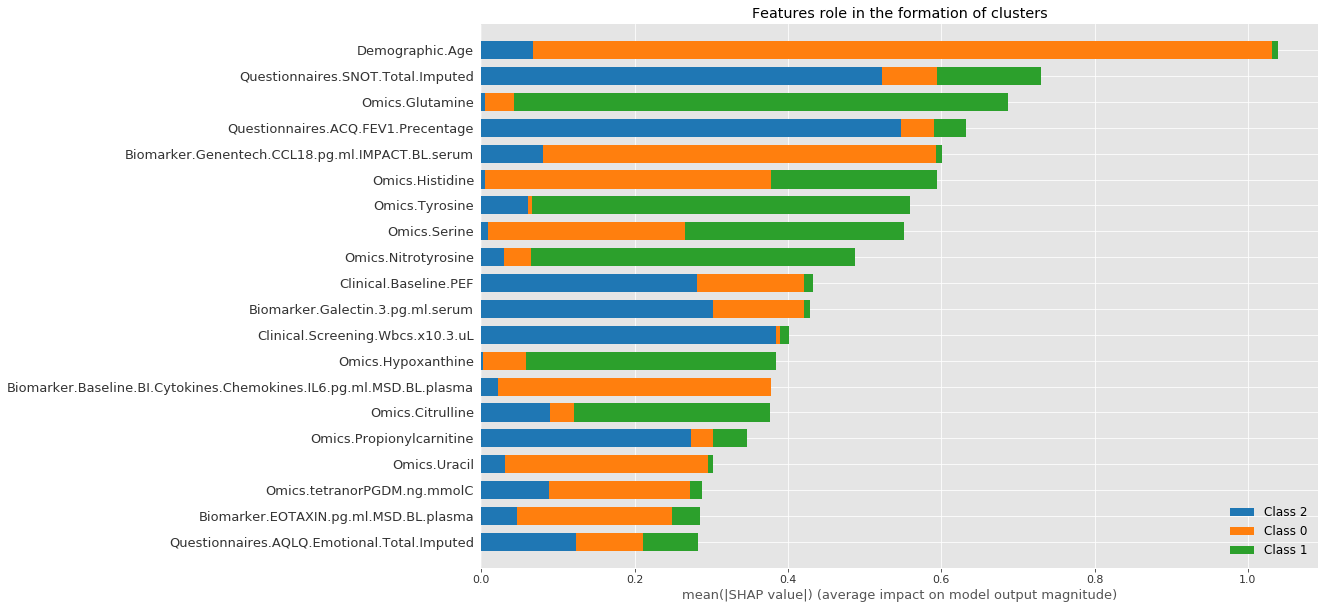

In [47]:
shap.summary_plot(shap_values_kp, cat_data, plot_type="bar", plot_size=(15, 10),color=plt.get_cmap("tab10"),show=False)
ax = plt.gca()
plt.title("Features role in the formation of clusters")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_3_clusters.pdf',format='pdf', dpi=1000, bbox_inches='tight')
#It seems like approximately 11 features (up to Biomarker Galectin) have been important in designing the

SHAP PLOT CLUSTER 1

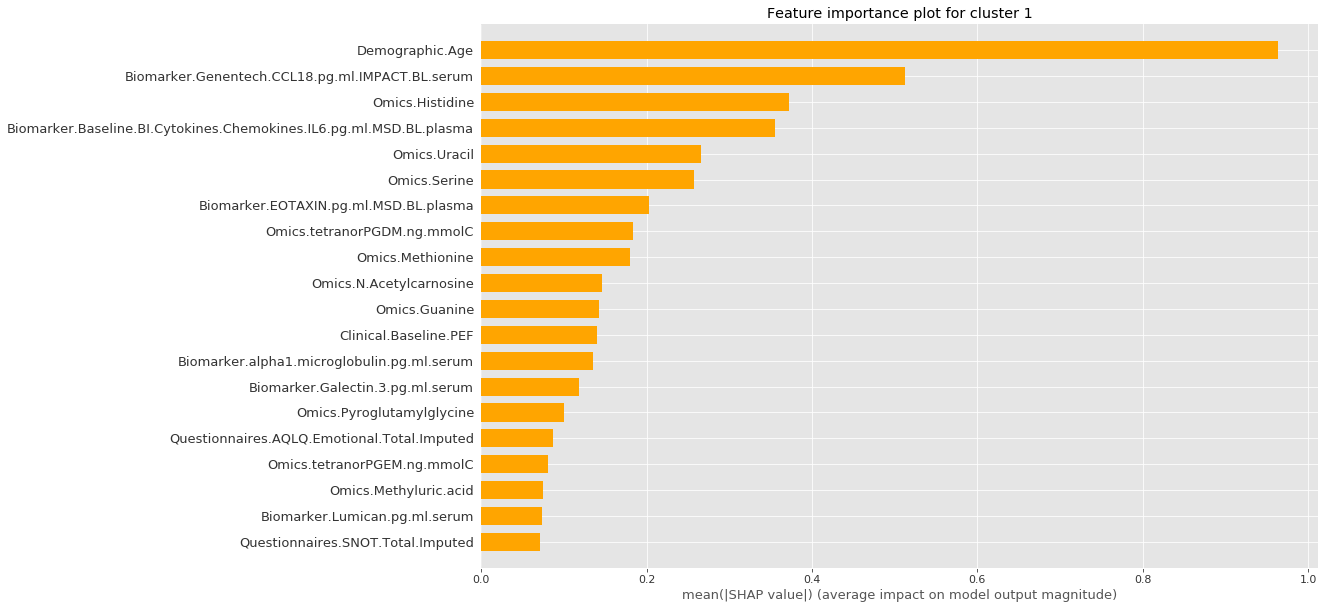

In [45]:
shap.summary_plot(shap_values_kp[0], cat_data, plot_type="bar", plot_size=(15, 10),color = "orange",show=False)
ax = plt.gca()
plt.title("Feature importance plot for cluster 1")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_clust1.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 2

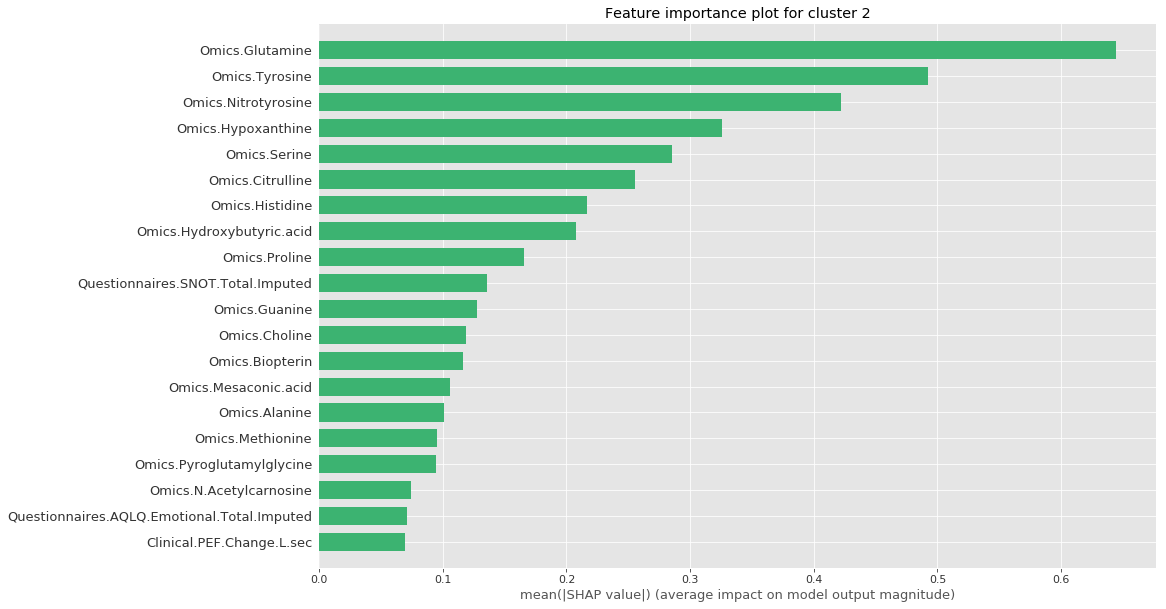

In [41]:
shap.summary_plot(shap_values_kp[1], cat_data, plot_type="bar", plot_size=(15, 10),color="mediumseagreen",show=False)
ax = plt.gca()
plt.title("Feature importance plot for cluster 2")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_clust2.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 3

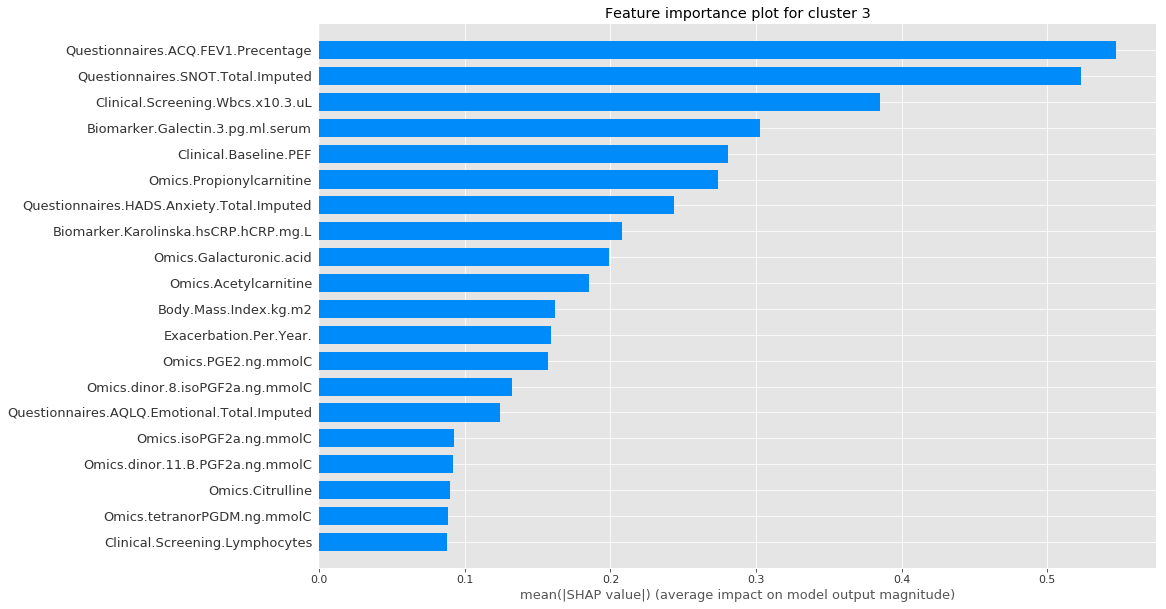

In [42]:
shap.summary_plot(shap_values_kp[2], cat_data, plot_type="bar", plot_size=(15, 10),show=False)
ax = plt.gca()
plt.title("Feature importance plot for cluster 3")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_clust3.pdf',format='pdf', dpi=1000, bbox_inches='tight')

REDO THE EVALUATION OF CLUSTERING USING MODEL WITH SCALED CATEGORICAL VARIABLES

1. DISTINCTIVENESS OF CLUSTERS BY CROSS-VALIDATED F1 SCORE

In [82]:
#Use of LightGBM as my classifier because it handles categorical variables and because it is relatively fast to obtain shap values for the trained models.
clf_kp_scale_cat = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp_scale_cat = cross_val_score(clf_kp_scale_cat, cat_data_scale_cat, kproto_df_scale_cat_lab, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp_scale_cat)}')
#CV score of 0.856 (close to 1)meaning that the observations are grouped in meaningful and distinguishable clusters.

CV F1 score for K-Prototypes clusters is 0.8350243839262086


In [83]:
clf_kp_scale_cat.fit(cat_data_scale_cat, kproto_df_scale_cat_lab)

LGBMClassifier(colsample_by_tree=0.8)

In [84]:
explainer_kp_scale_cat = shap.TreeExplainer(clf_kp_scale_cat)
shap_values_kp_scale_cat = explainer_kp_scale_cat.shap_values(cat_data_scale_cat)

2. INFORMATIVENESS OF CLUSTERS BY SHAP FEATURES IMPORTANCE

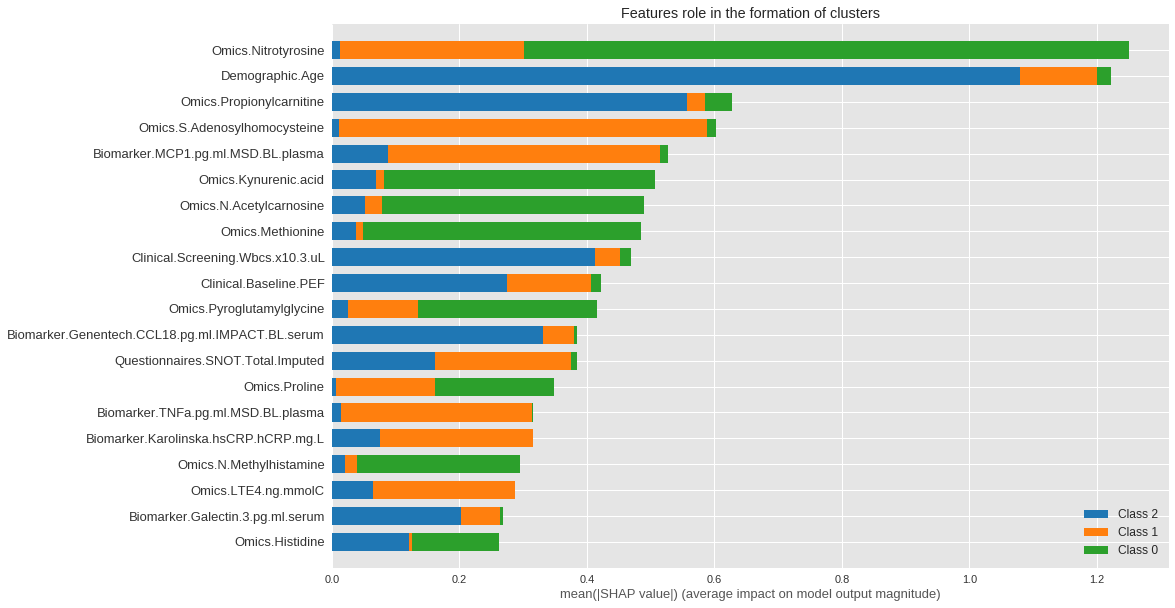

In [85]:
shap.summary_plot(shap_values_kp_scale_cat, cat_data_scale_cat, plot_type="bar", plot_size=(15, 10),color=plt.get_cmap("tab10"),show=False)
ax = plt.gca()
plt.title("Features role in the formation of clusters")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_3_clusters_scale_cat.pdf',format='pdf', dpi=1000, bbox_inches='tight')
#It seems like approximately 14 features (up to OMICs.proline) have been important in designing the clustering of observations

SHAP PLOT CLUSTER 1

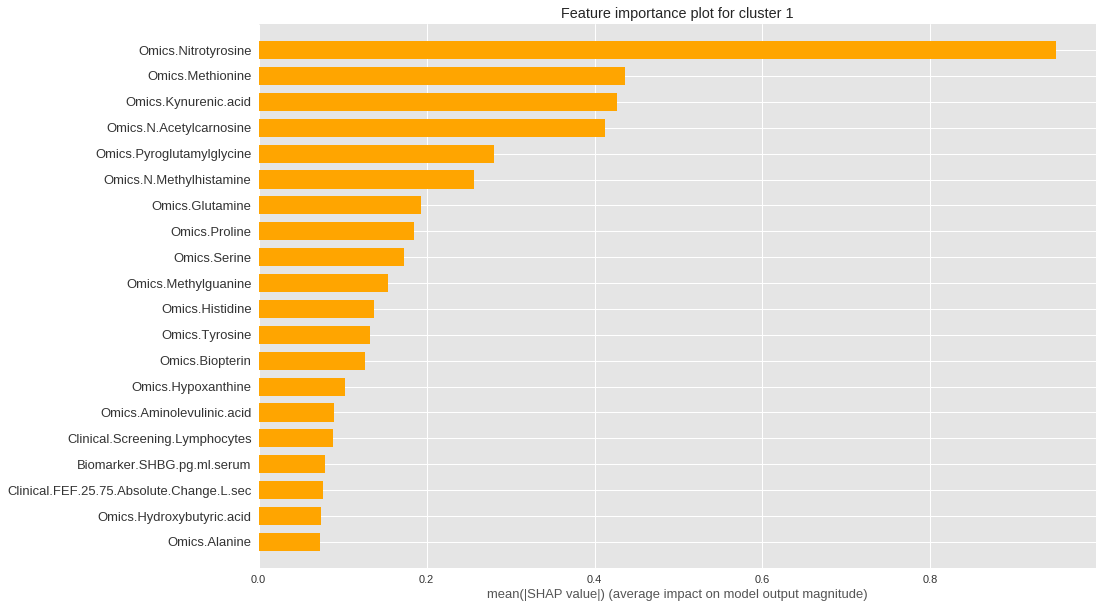

In [86]:
shap.summary_plot(shap_values_kp_scale_cat[0], cat_data_scale_cat, plot_type="bar", plot_size=(15, 10),color = "orange",show=False)
ax = plt.gca()
plt.title("Feature importance plot for cluster 1")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_clust1_scale_cat.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 2

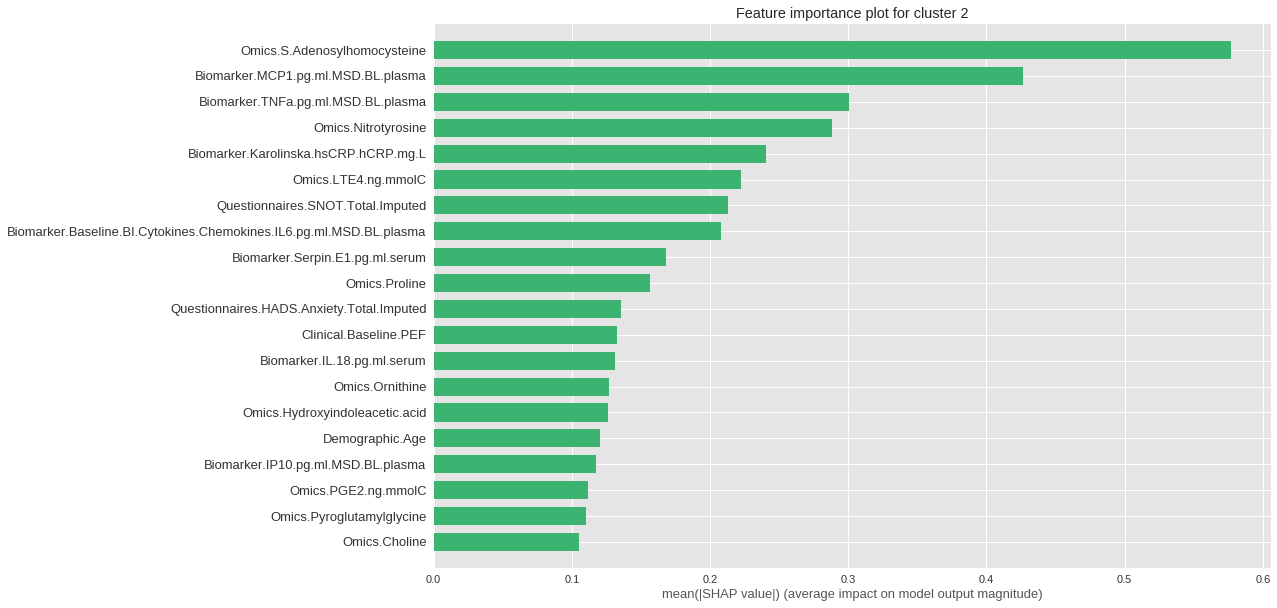

In [87]:
shap.summary_plot(shap_values_kp_scale_cat[1], cat_data_scale_cat, plot_type="bar", plot_size=(15, 10),color="mediumseagreen",show=False)
ax = plt.gca()
plt.title("Feature importance plot for cluster 2")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_clust2_scale_cat.pdf',format='pdf', dpi=1000, bbox_inches='tight')

SHAP PLOT CLUSTER 3

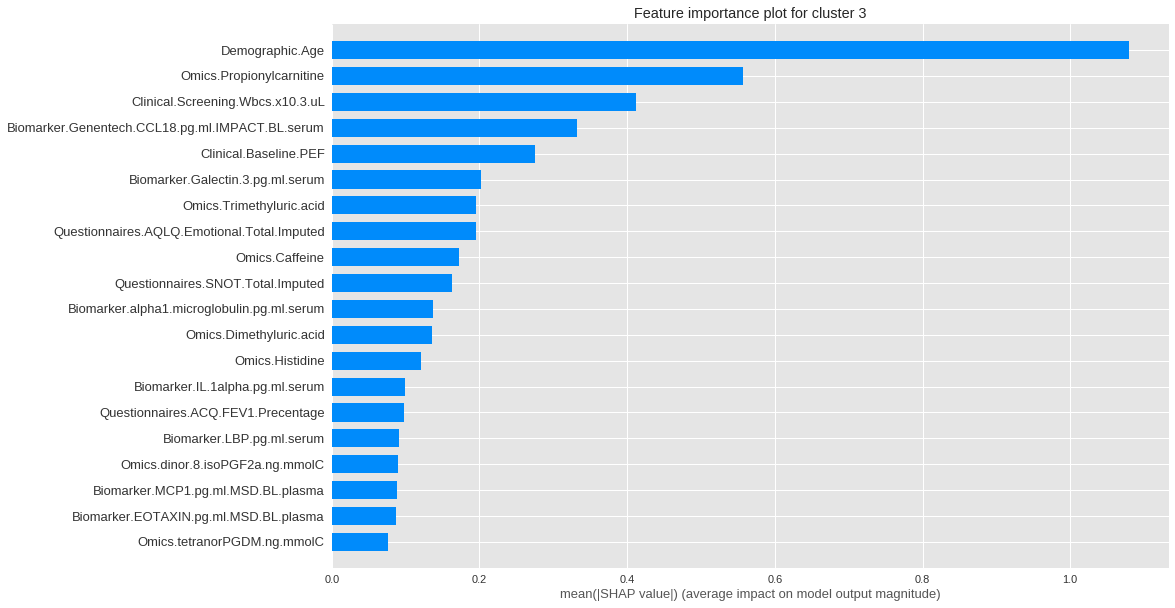

In [88]:
shap.summary_plot(shap_values_kp_scale_cat[2], cat_data_scale_cat, plot_type="bar", plot_size=(15, 10),show=False)
ax = plt.gca()
plt.title("Feature importance plot for cluster 3")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_clust3_scale_cat.pdf',format='pdf', dpi=1000, bbox_inches='tight')

In [89]:
cat_data_scale_cat.head(5)

Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
X                                                              
A_348                  -0.342803                    0.661544   
A_544                  -0.185872                   -2.475151   
A_018                   0.064556                   -0.500135   
A_613                   1.087608                    0.566182   
A_390                   0.794419                   -2.964420   

       Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
X                                                                 
A_348                    -0.873296                    -0.118239   
A_544                    -0.264045                     0.551317   
A_018                     0.238829                     0.196620   
A_613                     0.321316                     1.120895   
A_390                     0.080898                     0.143794   

       Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
X                                                                      
A_348                         -1.316411                    -0.104893   
A_544                          0.401209                     1.164455   
A_018                         -0.065821                    -1.517908   
A_613                         -0.190881                     0.961596   
A_390                          0.937631                     0.910840   

       Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
X                                                                          
A_348                         1.657433                          1.362411   
A_544                         1.657433                         -0.542305   
A_018                        -0.346662                         -0.747502   
A_613                         0.069512                          1.841401   
A_390                         1.657433                         -0.487365   

       Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  \
X                                                                 
A_348                   0.139224                      -0.034611   
A_544                   0.122940                      -0.685494   
A_018                  -0.024157                      -0.481220   
A_613                  -1.456158                      -0.364941   
A_390                  -0.540695                      -0.999027   

       Biomarker.MCP.4.pg.ml.serum  Biomarker.MMP.3.pg.ml.serum  \
X                                                                 
A_348                     2.208153                            0   
A_544                    -0.427698                            0   
A_018                    -1.170410                            0   
A_613                     0.383501                            0   
A_390                     0.614199                            0   

       Biomarker.RAGE.pg.ml.serum  Biomarker.SHBG.pg.ml.serum  \
X                                                               
A_348                    0.019561                    0.386541   
A_544                   -0.204663                   -0.429325   
A_018                   -0.216626                    3.402404   
A_613                   -0.613829                    0.379189   
A_390                   -1.048328                   -1.869631   

       Biomarker.Serpin.E1.pg.ml.serum  \
X                                        
A_348                         0.497764   
A_544                        -0.704478   
A_018                        -0.253732   
A_613                         0.378126   
A_390                        -0.449252   

       Biomarker.alpha1.microglobulin.pg.ml.serum  \
X                                                   
A_348                                    0.318004   
A_544                                    0.290463   
A_018                                   -0.618573   
A_613                                    0.480284   
A_390                                    

In [90]:
#Save cat_data_scale_cat as the new df to use for preweighted clustering. Standardized imputed num variables and scaled with robust outliers handling for labeled encode cat variables
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
cat_data_scale_cat.to_csv("df_for_preweighted_clustering.csv")

APPEND CLUSTERS RESULTS TO DF_NEEDING_CLUSTER RESULTS

In [93]:
#Save the obtained clusters in a dictionary where keys are ID's and values are the cluster numbers. Append the clusters to the data you want to append.
clust_dict={}
clust=[]
for s, c in zip(ID, cluster_df_scale_cat):
    clust_dict[s]=c
    clust.append(c)
df_to_be_appended['cluster']=clust

APPEND CLUSTERS RESULTS TO CAT_DATA_SCALE_CAT

In [95]:
#Append the cluster results and save it
clust_dict={}
clust=[]
for s, c in zip(ID, cluster_df_scale_cat):
    clust_dict[s]=c
    clust.append(c)
cat_data_scale_cat['cluster']=clust
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes/Final")
cat_data_scale_cat.to_csv("df_unsup_clusters_attached.csv")

In [99]:
df_to_be_appended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 412 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum. to cluster
dtypes: int64(205), object(207)
memory usage: 1.9+ MB


In [100]:
df_to_be_appended.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                           
4                                                334              

In [70]:
#Set patient ID as index in this dataset
df_to_be_appended.set_index('X',inplace=True)

In [72]:
#Save dataset for HTML tables and parallel coordinates chart
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
df_to_be_appended.to_csv('df_for_HTML_tables_non_processed.csv')

DO THE EXACT SAME APPEND BUT TO DATAFRAME ENTIRELY PROCESSED (THE ONE WE USE FOR CLUSTERING)

In [47]:
cat_data_scale_cat.head(5)

Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
X                                                              
A_348                  -0.342803                    0.661544   
A_544                  -0.185872                   -2.475151   
A_018                   0.064556                   -0.500135   
A_613                   1.087608                    0.566182   
A_390                   0.794419                   -2.964420   

       Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
X                                                                 
A_348                    -0.873296                    -0.118239   
A_544                    -0.264045                     0.551317   
A_018                     0.238829                     0.196620   
A_613                     0.321316                     1.120895   
A_390                     0.080898                     0.143794   

       Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
X                                                                      
A_348                         -1.316411                    -0.104893   
A_544                          0.401209                     1.164455   
A_018                         -0.065821                    -1.517908   
A_613                         -0.190881                     0.961596   
A_390                          0.937631                     0.910840   

       Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
X                                                                          
A_348                         1.657433                          1.362411   
A_544                         1.657433                         -0.542305   
A_018                        -0.346662                         -0.747502   
A_613                         0.069512                          1.841401   
A_390                         1.657433                         -0.487365   

       Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  \
X                                                                 
A_348                   0.139224                      -0.034611   
A_544                   0.122940                      -0.685494   
A_018                  -0.024157                      -0.481220   
A_613                  -1.456158                      -0.364941   
A_390                  -0.540695                      -0.999027   

       Biomarker.MCP.4.pg.ml.serum  Biomarker.MMP.3.pg.ml.serum  \
X                                                                 
A_348                     2.208153                            0   
A_544                    -0.427698                            0   
A_018                    -1.170410                            0   
A_613                     0.383501                            0   
A_390                     0.614199                            0   

       Biomarker.RAGE.pg.ml.serum  Biomarker.SHBG.pg.ml.serum  \
X                                                               
A_348                    0.019561                    0.386541   
A_544                   -0.204663                   -0.429325   
A_018                   -0.216626                    3.402404   
A_613                   -0.613829                    0.379189   
A_390                   -1.048328                   -1.869631   

       Biomarker.Serpin.E1.pg.ml.serum  \
X                                        
A_348                         0.497764   
A_544                        -0.704478   
A_018                        -0.253732   
A_613                         0.378126   
A_390                        -0.449252   

       Biomarker.alpha1.microglobulin.pg.ml.serum  \
X                                                   
A_348                                    0.318004   
A_544                                    0.290463   
A_018                                   -0.618573   
A_613                                    0.480284   
A_390                                    

In [122]:
#Save the obtained clusters in a dictionary where keys are ID's and values are the cluster numbers. Append the clusters to the data you want to append.
clust_dict={}
clust=[]
for s, c in zip(ID, cluster_df_scale_cat):
    clust_dict[s]=c
    clust.append(c)
cat_data_scale_cat['cluster']=clust

In [50]:
#Save dataset for HTML tables and parallel coordinates chart
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Dataframes")
cat_data_scale_cat.to_csv('df_for_HTML_tables_processed.csv')

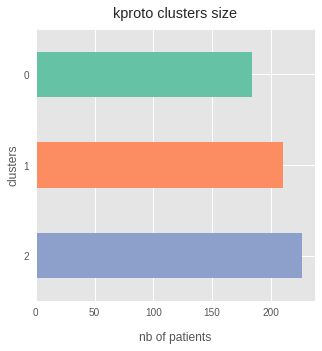

In [96]:
# clusters size
cat_data_scale_cat['cluster'].value_counts(sort=False).plot(
    kind='barh',
    color=['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3'],
    figsize=(5, 5)).invert_yaxis()
plt.xlabel('nb of patients', labelpad=14)
plt.ylabel('clusters')
plt.title('kproto clusters size', y=1.02)
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('k_proto_cluster_size_final.png')

In [54]:
#!pip install yellowbrick --user

  Using cached https://files.pythonhosted.org/packages/3a/15/58feb940b6a2f52d3335cccf9e5d00704ec5ba62782da83f7e2abeca5e4b/yellowbrick-1.3.post1-py3-none-any.whl


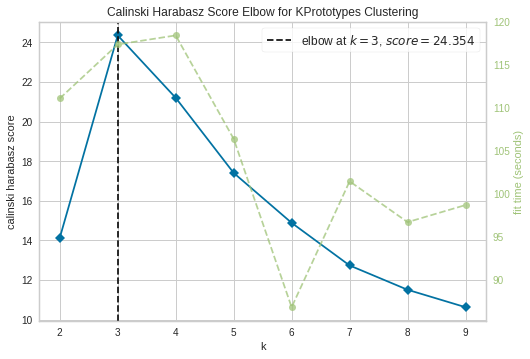

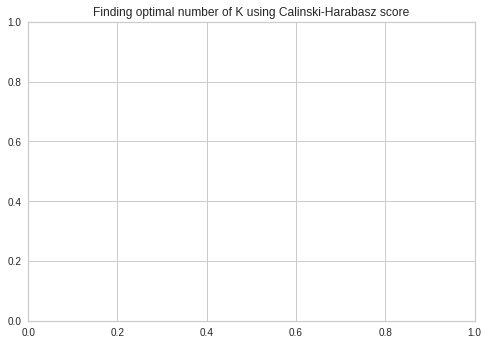

In [37]:
# Calinski Harabasz Score for unsupervised K-prototypes
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KPrototypes(init='Cao')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='calinski_harabasz', timings= True)
visualizer.fit(cat_data_scale_cat,categorical=cat_columns_df_clust)        # Fit the data to the visualizer
visualizer.show()
plt.title("Finding optimal number of K using Calinski-Harabasz score")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('CHindex_optK_unsupervised.pdf',format='pdf', dpi=1000, bbox_inches='tight')

VISUALIZATION OF THE CLUSTERS

In [52]:
#Import dataset for viz
df_viz = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/Final/df_unsup_clust_attached_viz.csv', low_memory=False)

In [53]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Columns: 370 entries, Unnamed: 0 to Severe_asthma
dtypes: float64(331), int64(32), object(7)
memory usage: 1.7+ MB


In [65]:
df_viz.head(10)

Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
Unnamed: 0                                                          
A_000                       -0.034072                    0.356054   
A_001                       -0.561225                    1.815707   
A_002                        0.664454                   -2.261435   
A_003                        0.208991                   -0.325842   
A_004                        0.751404                    0.566182   
A_005                        0.303117                   -0.325842   
A_006                       -0.505545                    0.048511   
A_007                       -0.792121                   -0.904596   
A_009                        0.256261                    0.566182   
A_010                        0.963586                   -0.244470   

            Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
Unnamed: 0                                                             
A_000                          0.067635                     1.299643   
A_001                          0.957684                     0.515475   
A_002                          0.949022                    -1.359742   
A_003                         -0.454279                     0.836137   
A_004                          1.342451                     2.181716   
A_005                          0.067635                     1.208152   
A_006                         -0.428185                     1.082547   
A_007                          0.091937                    -0.618421   
A_009                         -0.714994                     0.082858   
A_010                          0.608257                     1.394982   

            Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
Unnamed: 0                                                                  
A_000                               0.089172                    -0.094952   
A_001                               0.710679                     1.018721   
A_002                               0.844339                    -0.006900   
A_003                              -1.212127                    -0.520712   
A_004                               0.851947                    -0.206125   
A_005                               0.554991                    -0.006900   
A_006                              -0.832806                     1.483368   
A_007                               0.422233                    -1.819036   
A_009                              -0.866370                     0.408331   
A_010                              -0.362561                    -1.310349   

            Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
Unnamed: 0                                                                      
A_000                              1.657433                          0.007431   
A_001                              0.493331                          0.142075   
A_002                              0.924315                          0.524105   
A_003                              0.209961                          0.847219   
A_004                             -0.346662                          1.599645   
A_005                              0.351239                         -1.874297   
A_006                             -1.284655                          0.228400   
A_007                             -0.208819                         -0.220163   
A_009                             -0.483593                          1.460296   
A_010                             -0.888684                         -1.109189   

            Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  ...  \
Unnamed: 0                                                            ...   
A_000                        1.038906                       2.263200  ...   
A_001                       -0.462345                      -0.110832  ...   
A_002                       -0.307560                      -0.267282  ...   
A_003                       -0.0010

In [55]:
#Set X as index of df_viz
df_viz = df_viz.set_index('Unnamed: 0')

In [56]:
#Drop a few columns from df
df_unsup_outcome = df_viz.drop(['Healthy','Severe','Severe_Smoker','Severe_asthma','MildModerate','cluster'], axis = 1)

In [64]:
#Dataset with all variables for unsupervised clustering + severity group
df_unsup_outcome.head(10)

Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
Unnamed: 0                                                          
A_000                       -0.034072                    0.356054   
A_001                       -0.561225                    1.815707   
A_002                        0.664454                   -2.261435   
A_003                        0.208991                   -0.325842   
A_004                        0.751404                    0.566182   
A_005                        0.303117                   -0.325842   
A_006                       -0.505545                    0.048511   
A_007                       -0.792121                   -0.904596   
A_009                        0.256261                    0.566182   
A_010                        0.963586                   -0.244470   

            Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
Unnamed: 0                                                             
A_000                          0.067635                     1.299643   
A_001                          0.957684                     0.515475   
A_002                          0.949022                    -1.359742   
A_003                         -0.454279                     0.836137   
A_004                          1.342451                     2.181716   
A_005                          0.067635                     1.208152   
A_006                         -0.428185                     1.082547   
A_007                          0.091937                    -0.618421   
A_009                         -0.714994                     0.082858   
A_010                          0.608257                     1.394982   

            Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
Unnamed: 0                                                                  
A_000                               0.089172                    -0.094952   
A_001                               0.710679                     1.018721   
A_002                               0.844339                    -0.006900   
A_003                              -1.212127                    -0.520712   
A_004                               0.851947                    -0.206125   
A_005                               0.554991                    -0.006900   
A_006                              -0.832806                     1.483368   
A_007                               0.422233                    -1.819036   
A_009                              -0.866370                     0.408331   
A_010                              -0.362561                    -1.310349   

            Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
Unnamed: 0                                                                      
A_000                              1.657433                          0.007431   
A_001                              0.493331                          0.142075   
A_002                              0.924315                          0.524105   
A_003                              0.209961                          0.847219   
A_004                             -0.346662                          1.599645   
A_005                              0.351239                         -1.874297   
A_006                             -1.284655                          0.228400   
A_007                             -0.208819                         -0.220163   
A_009                             -0.483593                          1.460296   
A_010                             -0.888684                         -1.109189   

            Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  ...  \
Unnamed: 0                                                            ...   
A_000                        1.038906                       2.263200  ...   
A_001                       -0.462345                      -0.110832  ...   
A_002                       -0.307560                      -0.267282  ...   
A_003                       -0.0010

In [61]:
#Label encode severity outcome
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_unsup_outcome['cohort'] = le.fit_transform(df_unsup_outcome['cohort'])

In [62]:
#Visualize unsupervised clustering per severity group
fit_outcome_unsup = umap.UMAP()
%time embedding = fit_outcome_unsup.fit_transform(df_unsup_outcome)

CPU times: user 1min 27s, sys: 410 ms, total: 1min 28s
Wall time: 21.7 s


In [66]:
classes = ['Severe','Healthy','Severe_Smoker','Mild/Moderate']

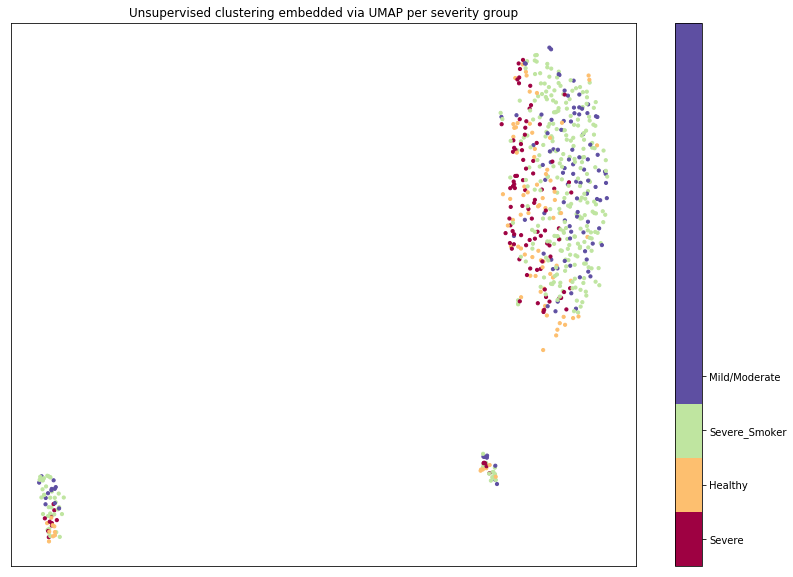

In [74]:
fig,ax = plt.subplots(1,figsize=(14,10))
plt.scatter(*embedding.T, s = 10, c = df_unsup_outcome['cohort'], cmap = 'Spectral', alpha =1.0)
plt.setp(ax,xticks = [], yticks = [])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(4))
cbar.set_ticklabels(classes)
plt.title('Unsupervised clustering embedded via UMAP per severity group')
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/")
plt.savefig('Unsupervised_clustering_severity_umap.pdf',format='pdf', dpi=1000, bbox_inches='tight')

Create same plot but with clusters separation

In [75]:
#Drop a few columns from df
df_unsup_cluster = df_viz.drop(['Healthy','Severe','Severe_Smoker','Severe_asthma','MildModerate','cohort'], axis = 1)

In [77]:
#Visualize unsupervised clustering with points belonging to each cluster
fit_cluster_unsup = umap.UMAP()
%time embedding_clust = fit_cluster_unsup.fit_transform(df_unsup_cluster)

CPU times: user 1min 30s, sys: 308 ms, total: 1min 30s
Wall time: 24.2 s


In [98]:
df_unsup_cluster.head(10)

Biomarker.C5a.pg.ml.serum  Biomarker.CD30.pg.ml.serum  \
Unnamed: 0                                                          
A_000                       -0.034072                    0.356054   
A_001                       -0.561225                    1.815707   
A_002                        0.664454                   -2.261435   
A_003                        0.208991                   -0.325842   
A_004                        0.751404                    0.566182   
A_005                        0.303117                   -0.325842   
A_006                       -0.505545                    0.048511   
A_007                       -0.792121                   -0.904596   
A_009                        0.256261                    0.566182   
A_010                        0.963586                   -0.244470   

            Biomarker.CD40L.pg.ml.serum  Biomarker.DPPIV.pg.ml.serum  \
Unnamed: 0                                                             
A_000                          0.067635                     1.299643   
A_001                          0.957684                     0.515475   
A_002                          0.949022                    -1.359742   
A_003                         -0.454279                     0.836137   
A_004                          1.342451                     2.181716   
A_005                          0.067635                     1.208152   
A_006                         -0.428185                     1.082547   
A_007                          0.091937                    -0.618421   
A_009                         -0.714994                     0.082858   
A_010                          0.608257                     1.394982   

            Biomarker.Galectin.3.pg.ml.serum  Biomarker.IL.18.pg.ml.serum  \
Unnamed: 0                                                                  
A_000                               0.089172                    -0.094952   
A_001                               0.710679                     1.018721   
A_002                               0.844339                    -0.006900   
A_003                              -1.212127                    -0.520712   
A_004                               0.851947                    -0.206125   
A_005                               0.554991                    -0.006900   
A_006                              -0.832806                     1.483368   
A_007                               0.422233                    -1.819036   
A_009                              -0.866370                     0.408331   
A_010                              -0.362561                    -1.310349   

            Biomarker.IL.1alpha.pg.ml.serum  Biomarker.IL.6Ralpha.pg.ml.serum  \
Unnamed: 0                                                                      
A_000                              1.657433                          0.007431   
A_001                              0.493331                          0.142075   
A_002                              0.924315                          0.524105   
A_003                              0.209961                          0.847219   
A_004                             -0.346662                          1.599645   
A_005                              0.351239                         -1.874297   
A_006                             -1.284655                          0.228400   
A_007                             -0.208819                         -0.220163   
A_009                             -0.483593                          1.460296   
A_010                             -0.888684                         -1.109189   

            Biomarker.LBP.pg.ml.serum  Biomarker.Lumican.pg.ml.serum  ...  \
Unnamed: 0                                                            ...   
A_000                        1.038906                       2.263200  ...   
A_001                       -0.462345                      -0.110832  ...   
A_002                       -0.307560                      -0.267282  ...   
A_003                       -0.0010

In [129]:
classes_2 = ['Cluster 1','Cluster 2','Cluster 3']

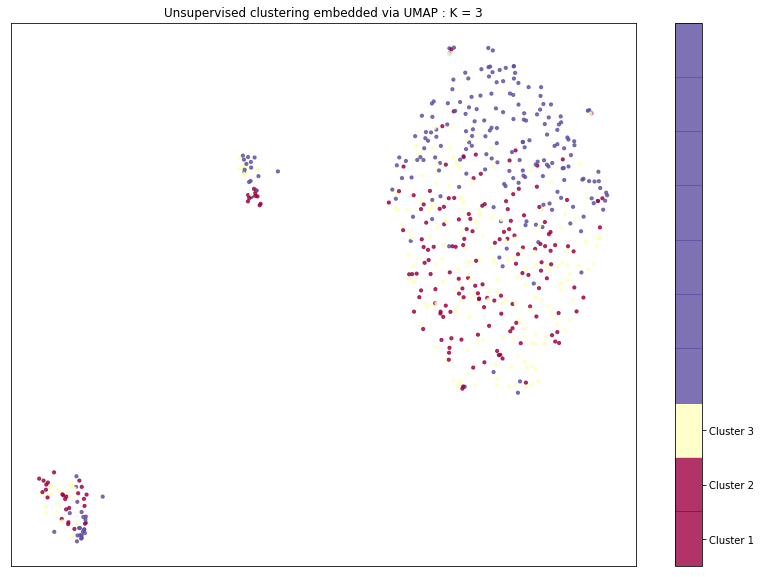

In [142]:
fig,ax = plt.subplots(1,figsize=(14,10))
plt.scatter(*embedding_clust.T, s = 10, c = df_unsup_cluster['cluster'], cmap = 'Spectral', alpha =0.8)
plt.setp(ax,xticks = [], yticks = [])
cbar = plt.colorbar(boundaries=np.arange(11)-0.5)
cbar.set_ticks(np.arange(3))
cbar.set_ticklabels(classes_2)
plt.title('Unsupervised clustering embedded via UMAP : K = 3')
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results/")
plt.savefig('Unsupervised_clustering_clusters_umap.pdf',format='pdf', dpi=1000, bbox_inches='tight')

In [120]:
#Install umap package for visualization purposes
#!pip install umap-learn[plot] --user
#!pip install datashader --user
#!pip install umap-learn==0.5.1 --user
#!pip install bokeh
#import umap.plot

In [16]:
#Preprocessing numerical
numerical = df_viz.select_dtypes(include='float64')

#for c in numerical.columns:
    #pt = PowerTransformer()
    #numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = df_viz.select_dtypes(exclude='float64')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df_viz.select_dtypes(exclude='float64').columns) / df_viz.shape[1]

#Embedding numerical & categorical
fit1 = umap.UMAP(metric='euclidean').fit(numerical)
fit2 = umap.UMAP(metric='dice').fit(categorical)

#Augmenting the numerical embedding with categorical
intersection = umap.umap_.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=categorical_weight)
intersection = umap.umap_.reset_local_connectivity(intersection)
#embedding = umap.umap_.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                #fit1._initial_alpha, fit1._a, fit1._b, 
                                                #fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                #200, 'random', np.random, fit1.metric, 
                                                #fit1._metric_kwds,fit1.densmap,fit1.output_dens,False)
#embedding=np.array(embedding)
#plt.figure(figsize=(20, 10))
#plt.scatter(*embedding.T, s=2, cmap='Spectral', alpha=1.0)
#plt.show()

%time u = fit1.fit_transform(df_viz)

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable


ValueError: could not convert string to float: 'no'

In [26]:
def draw_umap(n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', title=''):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    u = fit.fit_transform(df_viz);
    fig = plt.figure()
    if n_components == 1:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], range(len(u)), c=df_viz['cluster'])
    if n_components == 2:
        ax = fig.add_subplot(111)
        ax.scatter(u[:,0], u[:,1], c=df_viz['cluster'])
    if n_components == 3:
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(u[:,0], u[:,1], u[:,2], c=df_viz['cluster'], s=100)
    plt.title(title, fontsize=18)

In [24]:
fit = umap.UMAP()
%time u = fit.fit_transform(df_viz)

CPU times: user 1min 16s, sys: 178 ms, total: 1min 16s
Wall time: 9.27 s


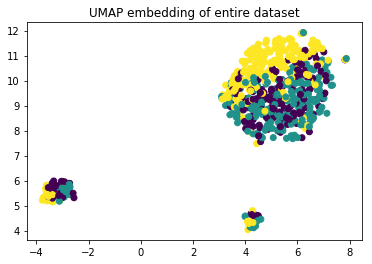

In [25]:
plt.scatter(u[:,0], u[:,1], c = df_viz['cluster'])
plt.title('UMAP embedding of entire dataset');

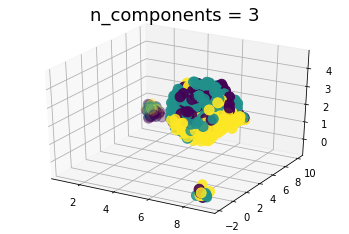

In [27]:
draw_umap(n_components=3, title='n_components = 3')

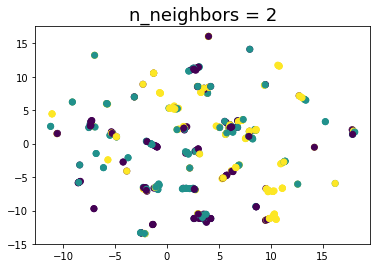

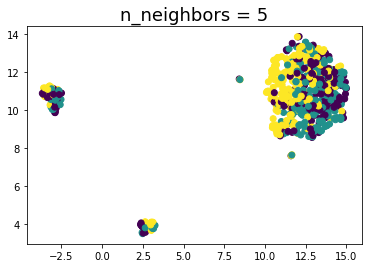

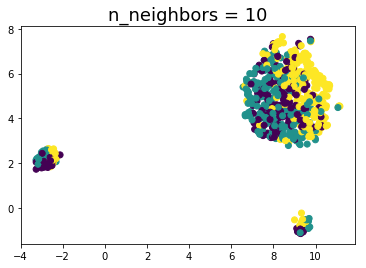

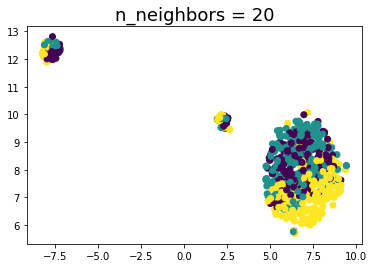

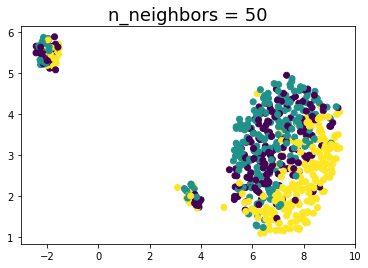

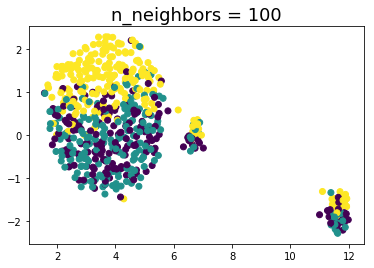

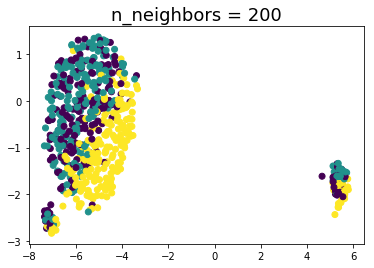

In [28]:
for n in (2, 5, 10, 20, 50, 100, 200):
    draw_umap(n_neighbors=n, title='n_neighbors = {}'.format(n))

fig,axs = plt.subplots(2,2)

axs[0,0].scatter(df.iloc[:,0],n)
axs[0,1].scatter(df.iloc[:,1],n)
axs[1,0].scatter(df.iloc[:,2],n)
axs[1,1].scatter(df.iloc[:,3],n)

plt.show()

Change distance metric

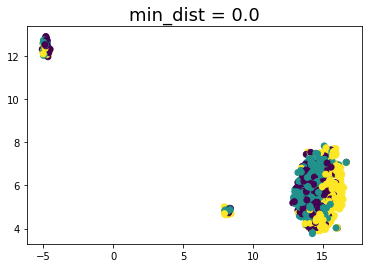

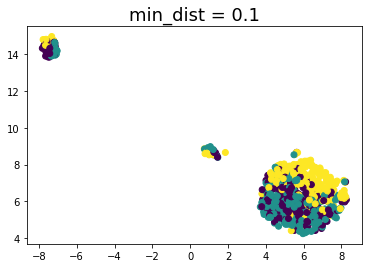

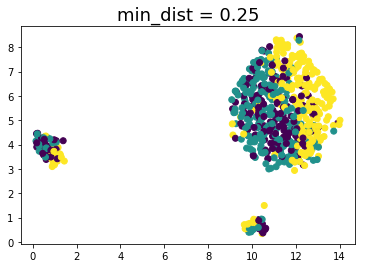

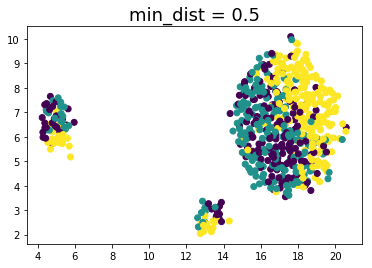

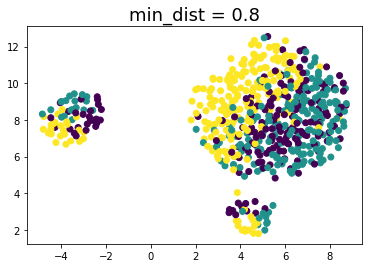

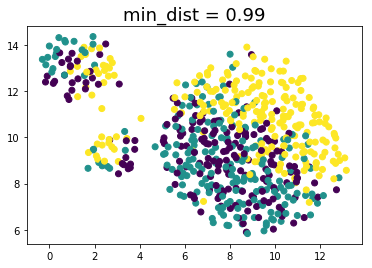

In [29]:
for d in (0.0, 0.1, 0.25, 0.5, 0.8, 0.99):
    draw_umap(min_dist=d, title='min_dist = {}'.format(d))

In [102]:
numeric_mapper = umap.UMAP(n_neighbors=15, random_state=42).fit(numerical)
categorical_mapper = umap.UMAP(metric="dice", n_neighbors=15, random_state=42).fit(categorical)

gradient function is not yet implemented for dice distance metric; inverse_transform will be unavailable


In [158]:
!pip install holoviews "bokeh>=2.3.2" --user

ERROR: panel 0.12.3 has requirement bokeh<2.5.0,>=2.4.0, but you'll have bokeh 2.3.3 which is incompatible.
  Found existing installation: bokeh 1.4.0
    Uninstalling bokeh-1.4.0:
      Successfully uninstalled bokeh-1.4.0
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [163]:
!pip install holoviews==1.12.7 --user

     |████████████████████████████████| 4.0MB 15.1MB/s 
  Found existing installation: holoviews 1.14.6
    Uninstalling holoviews-1.14.6:
      Successfully uninstalled holoviews-1.14.6
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [114]:
import umap.plot
umap.plot.points(numeric_mapper, values=df_to_be_appended["cluster"], cmap="viridis")

The umap.plot package requires extra plotting libraries to be installed.
    You can install these via pip using

    pip install umap-learn[plot]

    or via conda using

     conda install pandas matplotlib datashader bokeh holoviews colorcet scikit-image
    


ImportError: umap.plot requires pandas matplotlib datashader bokeh holoviews scikit-image and colorcet to be installed

In [101]:
umap.plot.points(intersection, values=df_to_be_appended["cluster"], cmap="viridis")

AttributeError: module 'umap' has no attribute 'plot'

In [89]:
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns
#import umap
%matplotlib inline

TypeError: tuple indices must be integers or slices, not tuple

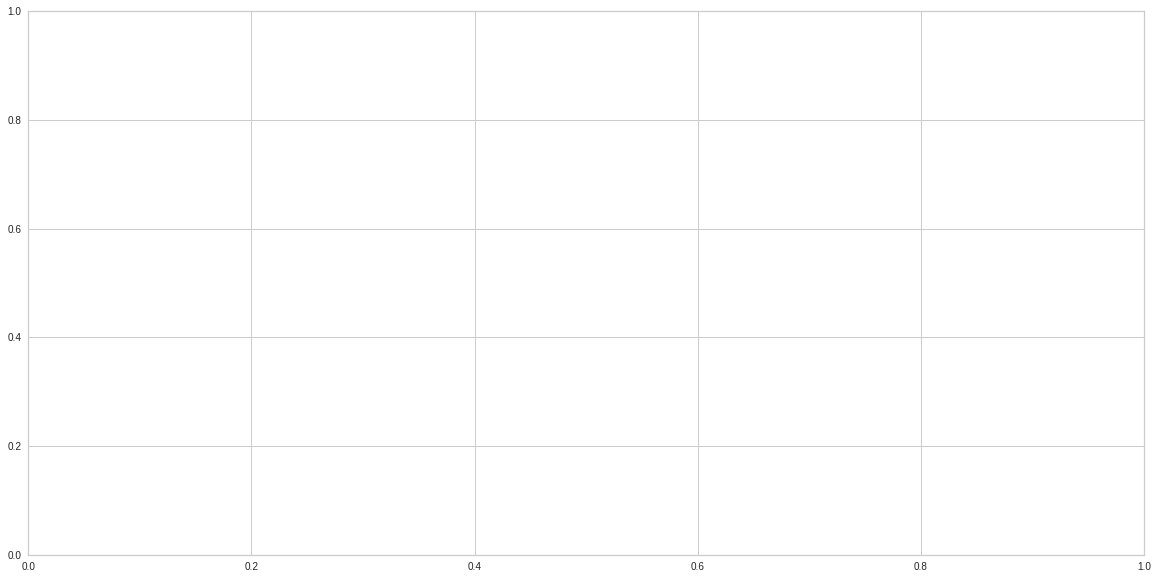

In [177]:
#Try visualizing the clusters
fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=cluster_df_scale_cat, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=3),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

DRAFT

In [ ]:
shap.summary_plot(shap_values_kp[1], cat_data, plot_type="bar", plot_size=(15, 10),color="mediumseagreen",show=False)
ax = plt.gca()
plt.title("Feature importance plot for cluster 2")
#import os
os.chdir("/rds/general/user/md2620/home/asthma/Malo/Results")
plt.savefig('shap_plot_clust2.pdf',format='pdf', dpi=1000, bbox_inches='tight')

In [245]:
clf_kp_clust1 = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp_clust1 = cross_val_score(clf_kp_clust1, cat_data, kproto_df_clust_lab==1, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp_clust1)}')

CV F1 score for K-Prototypes clusters is 0.8544791964738142


In [248]:
sub_df_clust_1.set_index('X',inplace=True)
sub_df_clust_1.head(5)

X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
X                                                                                                                
A_348                                                 31                                                         
A_544                                                 34                                                         
A_064                                                 62                                                         
A_589                                                 63                                                         
A_713                                                 36                                                         

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
X                                                                                                                 
A_348                                                 48                                                          
A_544                                                 16                                                          
A_064                                                 24                                                          
A_589                                                 36                                                          
A_713                                                 88                                                          

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                               2691                                                           
A_544                                               3978                                                           
A_064                                               5674                                                           
A_589                                               4175                                                           
A_713                                                505                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
X                                                                                                                  
A_348                                              92306                                                           
A_544                                             119317                                                           
A_064                                              93357                                                           
A_589                                              79825                                                           
A_713                                              49480                                                           

       X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
X                                                                                                                       
A_348                                               3729                                                                
A_544                                               6518                                                                
A_064                                               8569                                                                
A_589                                               4546                                                                
A_713                                             

In [249]:
X = sub_df_clust_1.loc[:, sub_df_clust_1.columns != 'cluster']
y = sub_df_clust_1['cluster']

In [250]:
clf_kp_clust1 = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp_clust1 = cross_val_score(clf_kp_clust1, X, y, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp_clust1)}')

CV F1 score for K-Prototypes clusters is 1.0


In [251]:
clf_kp_clust1.fit(cat_data, kproto_df_clust_lab==1)

LGBMClassifier(colsample_by_tree=0.8)

In [254]:
explainer_kp_clust1 = shap.TreeExplainer(clf_kp_clust1)
shap_values_kp_clust1 = explainer_kp_clust1.shap_values(X)

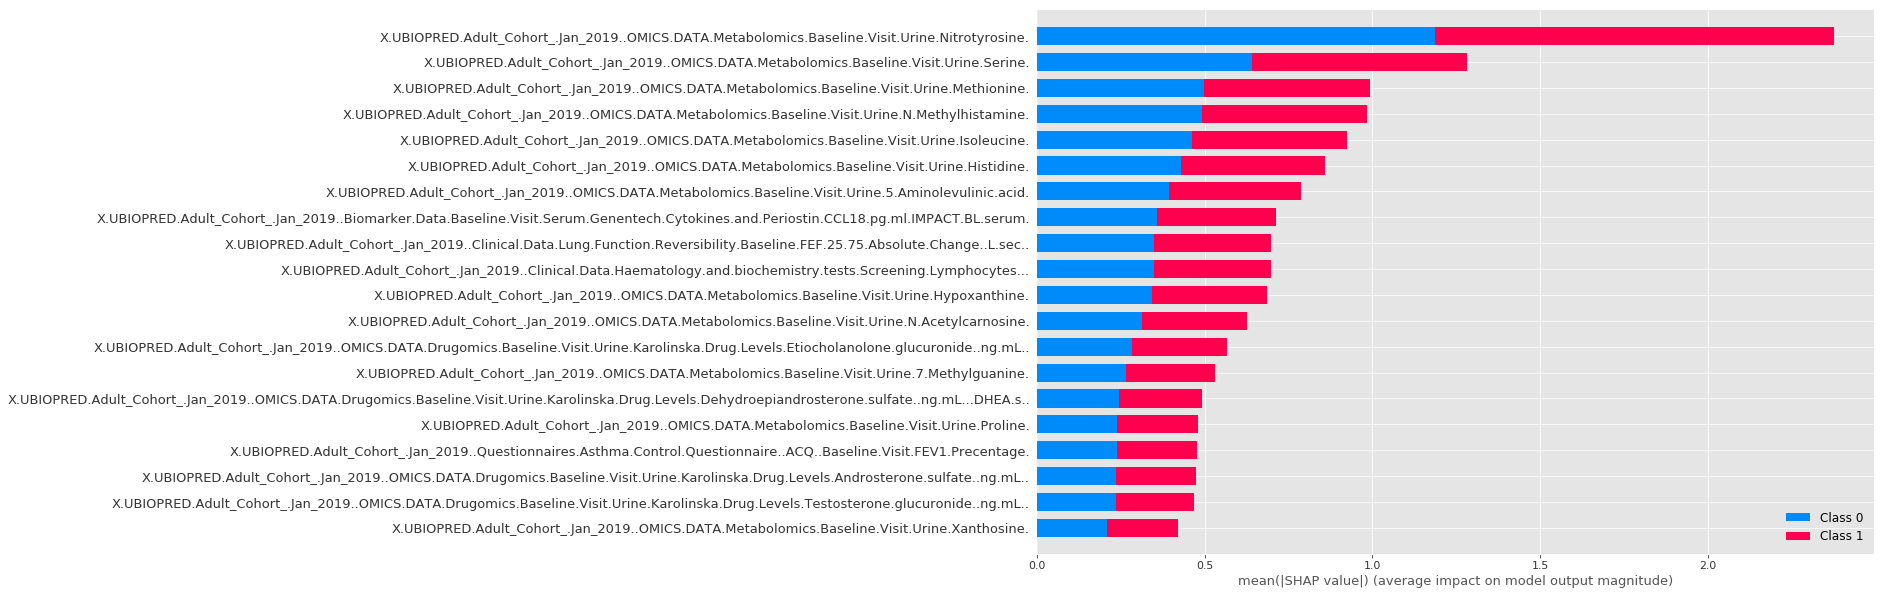

In [256]:
shap.summary_plot(shap_values_kp_clust1, X, plot_type="bar", plot_size=(15, 10),show=False)
ax = plt.gca()

In [223]:
kproto_df_clust_lab.isin([1])

AttributeError: 'numpy.ndarray' object has no attribute 'isin'

FEW MANIPULATIONS ON DF_TO_BE_APPENDED_FINAL

In [231]:
df_to_be_appended_final.drop('Unnamed: 0', axis = 1, inplace = True)
df_to_be_appended_final.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                         

In [233]:
df_to_be_appended_final.iloc[:,205:412].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.                                                                  object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.                                                                  object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Historic.Test.                                                                            object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Aspirin.                                                             object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Barns.                                                               object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Cold.Air.                                                            object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Dust.                            

In [234]:
#Convert range of variables 176-364 to object as they are recorded as float but are in fact ordinal (categorical) variables
df_to_be_appended_final.iloc[:,205:412]=df_to_be_appended_final.iloc[:,205:412].astype('category')

In [235]:
#Save the obtained clusters in a dictionary where keys are ID's and values are the cluster numbers. Append the clusters to the copy of the data.
clust_dict={}
clust=[]
for s, c in zip(ID, cluster_df_clust):
    clust_dict[s]=c
    clust.append(c)
df_to_be_appended_final['cluster']=clust

In [240]:
df_to_be_appended_final.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                                 31                                                         
1                                                 34                                                         
2                                                 39                                                         
3                                                 62                                                         
4                                                 55                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                                 48                                                          
1                                                 16                                                          
2                                                 30                                                          
3                                                 46                                                          
4                                                 14                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                               2691                                                           
1                                               3978                                                           
2                                               5106                                                           
3                                               5296                                                           
4                                               4746                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                              92306                                                           
1                                             119317                                                           
2                                             104613                                                           
3                                             144767                                                           
4                                             102499                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                               3729                                                                
1                                               6518                                                                
2                                               5682                                                                
3                                               5468                                                                
4                                               7550                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                                214                                                           
1                                                370                                                           
2                                                102                                                           
3                                                341                                                         

In [241]:
sub_df_clust_1 = df_to_be_appended_final[df_to_be_appended_final['cluster'].isin([1])]

In [242]:
label_shap_clust_1 = sub_df_clust_1['cluster']

In [222]:
kproto_df_clust_lab ==1

array([ True,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False,  True,  True,  True, False,  True,  True, False,  True,
        True, False, False, False, False,  True,  True, False, False,
       False, False, False,  True, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
        True, False, False,  True, False, False, False, False, False,
       False,  True, False,  True, False,  True, False, False,  True,
        True, False, False, False,  True, False, False,  True, False,
       False,  True,  True, False, False, False, False, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True,

In [90]:
df_clust_2 = pd.read_csv('/rds/general/user/md2620/home/asthma/Malo/Dataframes/df_to_be_clustered_08+_with_ID_plus_stand.csv', low_memory=False)

In [92]:
df_clust_2.head(5)

Unnamed: 0      X  \
0           0  A_348   
1           1  A_544   
2           2  A_018   
3           3  A_613   
4           4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                          -0.342803                                                         
1                                          -0.185872                                                         
2                                           0.064556                                                         
3                                           1.087608                                                         
4                                           0.794419                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           0.661544                                                          
1                                          -2.475151                                                          
2                                          -0.500135                                                          
3                                           0.566182                                                          
4                                          -2.964420                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                          -0.873296                                                           
1                                          -0.264045                                                           
2                                           0.238829                                                           
3                                           0.321316                                                           
4                                           0.080898                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                          -0.118239                                                           
1                                           0.551317                                                           
2                                           0.196620                                                           
3                                           1.120895                                                           
4                                           0.143794                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                          -1.316411                                                                
1                                           0.401209                                                                
2                                          -0.065821                                                                
3                                          -0.190881                                                                
4                                           0.937631                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          -0.104893                                                           
1                                           1.164455                                                           
2                                          -1.517908                                                           
3                                

In [93]:
df_clust_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 413 entries, Unnamed: 0 to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(263), int64(20), object(130)
memory usage: 2.0+ MB


In [98]:
df_clust_2.dtypes

Unnamed: 0                                                                                                                                                                  int64
X                                                                                                                                                                          object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.                                                                   float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.                                                                  float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.                                                                 float64
X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.     

DROP SOME VARIABLES YOU DON'T WANT FOR CLUSTERING

In [99]:
df_clust_2.drop(list(df_clust_2.filter(regex = 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Medication.')), axis = 1, inplace = True)

In [100]:
df_clust_2.drop(list(df_clust_2.filter(regex = 'X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.Clusters.')), axis = 1, inplace = True)

In [101]:
df_clust_2.drop(list(df_clust_2.filter(regex = 'X.UBIOPRED.Adult_Cohort_.Jan_2019..OMICS.DATA.Drugomics.Baseline.Visit.Urine.Karolinska.Drug.Levels.')), axis = 1, inplace = True)

In [108]:
#Drop Unnamed: 0 variable
df_clust_2.drop('X.UBIOPRED.Adult_Cohort_.Jan_2019..Visit.Information.Baseline.Visit.Days.Since.Screening..Baseline.Day.1..', axis = 1, inplace = True)

In [109]:
#Drop Unnamed: 0 variable
df_clust_2.drop('X.UBIOPRED.Adult_Cohort_.Jan_2019..Visit.Information.Baseline.Visit.Days.Since.Screening..Baseline.Day.2..', axis = 1, inplace = True)

In [112]:
df_clust_2.drop('Unnamed: 0', axis = 1, inplace = True)

In [113]:
df_clust_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 362 entries, X to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: float64(235), int64(19), object(108)
memory usage: 1.7+ MB


In [117]:
df_clust_2.head(5)

X  \
0  A_348   
1  A_544   
2  A_018   
3  A_613   
4  A_390   

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum.  \
0                                          -0.342803                                                         
1                                          -0.185872                                                         
2                                           0.064556                                                         
3                                           1.087608                                                         
4                                           0.794419                                                         

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD30.pg.ml.Luminex.serum.  \
0                                           0.661544                                                          
1                                          -2.475151                                                          
2                                          -0.500135                                                          
3                                           0.566182                                                          
4                                          -2.964420                                                          

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.CD40L.pg.ml.Luminex.serum.  \
0                                          -0.873296                                                           
1                                          -0.264045                                                           
2                                           0.238829                                                           
3                                           0.321316                                                           
4                                           0.080898                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.DPPIV.pg.ml.Luminex.serum.  \
0                                          -0.118239                                                           
1                                           0.551317                                                           
2                                           0.196620                                                           
3                                           1.120895                                                           
4                                           0.143794                                                           

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.Galectin.3.pg.ml.Luminex.serum.  \
0                                          -1.316411                                                                
1                                           0.401209                                                                
2                                          -0.065821                                                                
3                                          -0.190881                                                                
4                                           0.937631                                                                

   X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.IL.18.pg.ml.Luminex.serum.  \
0                                          -0.104893                                                           
1                                           1.164455                                                           
2                                          -1.517908                                                           
3                                           0.961596                                                         

Set aside X (Patient ID)

In [118]:
ID = df_clust_2['X'].to_list()
ID= np.asarray(ID)
len(ID)

620

In [120]:
#Drop X from dataframe
df_clust_2.drop('X', axis = 1, inplace = True)

TRANSFORM DATATYPE OF SOME VARIABLES

In [126]:
df_clust_2.iloc[:,176:361].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.                                                                  object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.                                                                  object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Historic.Test.                                                                            object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Aspirin.                                                             object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Barns.                                                               object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Cold.Air.                                                            object
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Dust.                            

In [159]:
#Convert range of variables 176-361 to object as they are recorded as float but are in fact ordinal (categorical) variables
df_clust_2.iloc[:,176:361]=df_clust_2.iloc[:,176:361].astype('category')

In [178]:
#Check that it has been converted successfully
df_clust_2.iloc[:,176:361].dtypes

X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Fev.Variation.                                                                 category
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Diagnosis.Pef.Variation.                                                                 category
X.UBIOPRED.Adult_Cohort_.Jan_2019..Asthma.Diagnosis.Historic.Test.                                                                           category
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Aspirin.                                                            category
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Barns.                                                              category
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Cold.Air.                                                           category
X.UBIOPRED.Adult_Cohort_.Jan_2019..Atopy.Exposures.and.Triggers.Baseline.Dust.                      

In [173]:
df_clust_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 620 entries, 0 to 619
Columns: 361 entries, X.UBIOPRED.Adult_Cohort_.Jan_2019..Biomarker.Data.Baseline.Visit.Luminex.Serum.C5a.pg.ml.Luminex.serum. to X.UBIOPRED.Adult_Cohort_.Jan_2019..Subject.History.Respiratory.History.Onset.OR.First.Diagnosis.Uncertain.
dtypes: category(185), float64(176)
memory usage: 997.4 KB


In [162]:
#Convert kprot_df to a numpy array that we call X_df
X_df_new = df_clust_2.iloc[:,:].values
#Look at shape
X_df_new.shape

(620, 361)

In [163]:
labelencoder1=LabelEncoder()

In [164]:
for i in range (176,361):
        X_df_new[:,i]=labelencoder1.fit_transform(X_df_new[:,i])
        print (i)

176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
284
285
286
287
288
289
290
291
292
293
294
295
296
297
298
299
300
301
302
303
304
305
306
307
308
309
310
311
312
313
314
315
316
317
318
319
320
321
322
323
324
325
326
327
328
329
330
331
332
333
334
335
336
337
338
339
340
341
342
343
344
345
346
347
348
349
350
351
352
353
354
355
356
357
358
359
360


In [165]:
new_df = pd.DataFrame(X_df_new)

In [166]:
new_df.head(5)

0         1          2         3          4         5          6  \
0  -0.342803  0.661544  -0.873296 -0.118239   -1.31641 -0.104893    1.65743   
1  -0.185872  -2.47515  -0.264045  0.551317   0.401209   1.16445    1.65743   
2  0.0645564 -0.500135   0.238829   0.19662 -0.0658211  -1.51791  -0.346662   
3    1.08761  0.566182   0.321316   1.12089  -0.190881  0.961596  0.0695119   
4   0.794419  -2.96442  0.0808977  0.143794   0.937631   0.91084    1.65743   

          7          8          9        10 11         12        13        14  \
0   1.36241   0.139224 -0.0346105   2.20815  0  0.0195606  0.386541  0.497764   
1 -0.542305    0.12294  -0.685494 -0.427698  0  -0.204663 -0.429325 -0.704478   
2 -0.747502 -0.0241573   -0.48122  -1.17041  0  -0.216626    3.4024 -0.253732   
3    1.8414   -1.45616  -0.364941  0.383501  0  -0.613829  0.379189  0.378126   
4 -0.487365  -0.540695  -0.999027  0.614199  0   -1.04833  -1.86963 -0.449252   

         15        16         17        18         19         20        21  \
0  0.318004   1.17271   0.120983   1.06774   0.894868   -2.25474   1.13034   
1  0.290463  0.484322 -0.0265542  0.414125   0.400075   0.292148 -0.782185   
2 -0.618573  -1.11704  -0.271109 -0.897445    -1.9202  -0.866183 -0.782185   
3  0.480284   1.00457   0.455893   1.17418  0.0928292  0.0850213   1.74851   
4  0.206515  0.539303   0.239393  0.430809    1.12585  -0.470132   1.13034   

         22        23         24         25        26        27        28  \
0   1.02159  0.912724   0.590104   0.808443  0.984769   1.04832   1.69952   
1 -0.559977 -0.301277  0.0627325  0.0655332 -0.564396  0.601069 -0.579673   
2  -1.83569 -0.770291   -1.48084   -1.08504 -0.564396 -0.533716 -0.579673   
3   2.60863   1.54699   0.590104    1.66231  0.984769  0.842148 -0.579673   
4  0.176036  0.409989    0.25375   0.155087  0.984769  0.675846 -0.579673   

         29         30         31         32        33        34         35  \
0  0.904766    0.70861     1.2958  0.0378242 -0.484569  -1.36647  -0.758742   
1 -0.313181   -1.16989     1.2688    0.31535  0.741944  -1.36647   0.143951   
2   0.18156 -0.0825979   -1.37655    1.05993 -0.740569  -1.36647   -1.95883   
3 -0.224474    0.70861  0.0100693    -0.0228  -1.83614  0.553131  0.0118737   
4  0.256082   -1.16989   0.569445   0.409579 -0.338215  0.553131 -0.0815864   

         36         37        38        39        40         41        42  \
0  -1.40082 -0.0849482   1.63847  -0.81526 -0.156962   -1.32629   1.76355   
1  0.251894  -0.267109 -0.604555  0.601285 -0.447786    0.37266 -0.524101   
2  -1.65299   0.381978 -0.604555 -0.619038  0.250722   -0.94758 -0.524101   
3 -0.190485 -0.0849482 -0.604555  0.273678  0.184964  0.0895746 -0.524101   
4  0.251894   0.238043 -0.604555  -1.27186  0.184964   0.784882   1.76355   

          43        44        45        46        47 48        49        50  \
0    1.20885   1.87058   -1.9005 -0.719238  -1.24847  0   0.17744 -0.915333   
1  -0.489998 -0.199335  0.570434 -0.123484  0.629634  0 -0.239338 -0.915333   
2   0.152145 -0.199335  0.228876   1.19211  0.629634  0  0.518625  0.710329   
3 -0.0611258  0.232936 -0.124502  0.463991  0.629634  0 -0.019646 -0.915333   
4  -0.489998  0.654837  0.570434 -0.139968  -1.24847  0   1.55128 -0.915333   

          51         52        53        54        55        56         57  \
0  -0.383601 -0.0401934 -0.167906  0.719739 -0.209215    2.4107    1.09574   
1   0.778148 -0.0401934 -0.167906  0.719739 -0.209215 -0.984492  -0.895892   
2   0.431987 -0.0401934 -0.167906  0.719739 -0.209215 -0.984492   -1.38716   
3  0.0479838 -0.0401934 -0.167906 -0.606219 -0.209215 -0.391305  -0.387872   
4  -0.383601 -0.0401934 -0.167906 -0.606219 -0.209215 -0.727111  0.0328741   

         58        59        60         61         62        63        64  \
0 -0.814939  -1.58989  0.118244  -0.932432  -0.591349  0.852079   1.75915   
1 -0.207259  -1.22141 -0.613197  0.0267487   -0.41601   1.03008   1.85092   
2  -

In [179]:
#Define categorical columns in df_clust
cat_columns = [175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,
239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,
280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,
321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360]

In [180]:
#From the multiple criteria, optimal number of K is 3
#Run kprototypes with K=3

style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

kproto_new = KPrototypes(n_clusters= 3, init='Cao', n_jobs = 4)
cluster_predict = kproto_new.fit_predict(X_df_new, categorical = cat_columns)

In [182]:
# Print cluster centroids of the trained model.
print(kproto_new.cluster_centroids_)

# Print training statistics
print(kproto_new.cost_)
print(kproto_new.n_iter_)

[[ 0.09952318  0.13629036  0.25162048 ...  0.          0.
   0.        ]
 [ 0.13307404  0.12900319  0.06001058 ...  0.          0.
   0.        ]
 [-0.17752464 -0.1967165  -0.20791908 ...  0.          0.
   0.        ]]
101253.53262968927
10


In [184]:
#Print count of each cluster
print(pd.Series(cluster_predict).value_counts())

2    249
1    217
0    154
dtype: int64


In [186]:
kproto_label = kproto_new.labels_

In [187]:
kproto_label

array([1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1,
       1, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 2,
       2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2,
       1, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2, 2, 1, 1, 0, 1, 2, 1, 0, 0,
       1, 0, 2, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 2, 1,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 0, 1, 1,
       2, 2, 1, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1,
       2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 0, 2,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 0, 2, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       0, 2, 0, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 2, 1,